# Aumentacion de Datos
Un problema habitual, es la cantidad de datos de los que se dispone para entrar los modelos, para que estos presenten los resultados esperados es necesario que el entrenamiento ocurra con una gran cantidad de datos (dataset), pero en muchas ocasiones no se dispone de los datos necesario para realizar estas tareas.
Es aquí donde entra la técnica **Data Augmentation** que, como indica su nombre, nos permite aumentar nuestro dataset de dos formas:




*   Introduciendo perturbaciones en los datos originales. Por ejemplo: tomando una imagen original centrada, la replicamos  descentrada, invirtiendo ejes…
*   Utilizando distintas distribuciones. Ej: si queremos entrenar un modelo para clasificar imágenes de alta resolución, añadimos imágenes de baja resolución, con ruido… siempre manteniendo la mayor proporción de alta resolución.



En un primer instante, las redes neuronales no son inteligentes. Por ejemplo, una red neuronal mal entrenada pensaría que estas tres pelotas de tenis que se muestran a continuación son imágenes distintas y únicas.

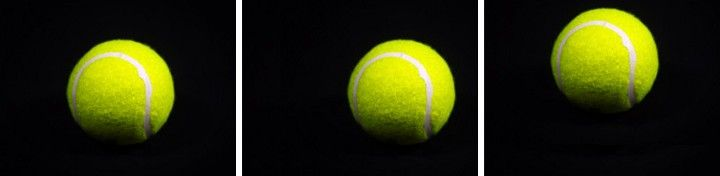



La misma pelota con algunas traslaciones



Entonces si trabajamos con imagenes, solo son necesarias hacer algunas pequeñas alteraciones a nuestro dataset y podremos conseguir nuestro objetivo.
Existen muchas formas de aumentacion de datos con imagenes, tales como:


1.   Dar a vuelta (Flip)
2.   Rotacion

1.   Escala
2.   Recorte

1.   Traslacion
2.   Ruido gaussiano









La biblioteca Keras brinda la capacidad de usar el aumento de datos automáticamente al entrenar un modelo.
Esto se logra mediante el uso de la clase ImageDataGenerator.
Se admiten una variedad de técnicas, así como métodos de escala de píxeles, como:



*   La cambios en la imagen (traslaciones) a través de los argumentos **width_shift_range** y **height_shift_range**.
*  La dar la vuelta a la imagen  mediante los argumentos **horizontal_flip** y **vertical_flip**.
*   Rotaciones de imágenes a través del argumento **rotation_range**
*   Brillo de la imagen mediante el argumento **brightness_range**.
*   Zoom de imagen mediante el argumento **zoom_range**.

Veamos de forma independiente ejemplos de imágenes después de que se hayan aumentado. Es común utilizar una variedad de técnicas de aumento al mismo tiempo durante el entrenamiento.


In [ ]:
import matplotlib.pyplot as plt    #Libreria que permite graficar, muy al estilo de MATLAB
import numpy as np                  #Libreria que permite trabajar con arreglo  
from numpy import expand_dims       #Expande la forma del arreglo 
from keras.preprocessing.image import load_img    #De la libreria de Keras para aumentacion de datos, cargamos la imagen en el formato de la libreria de imagenes de python (PIL)
from keras.preprocessing.image import img_to_array #tomará una  imagen (PIL) y la convierte en una matriz. Si parte de una imagen PNG, los valores dentro de la imagen estarán entre 0 y 255.
from keras.preprocessing.image import ImageDataGenerator #clase que toma datos originales, los transforma de forma aleatoria y devuelve solo los datos nuevos transformados
from PIL import Image #libreria de imagenes de python
from urllib.request import urlopen #Permite leer una direccion electronica


Primero cargamos una imagen de internet


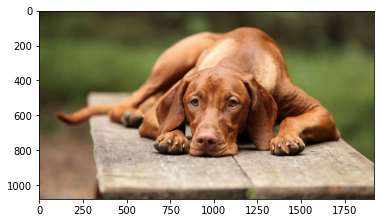

In [ ]:
url = 'https://www.perro-seguro.es/blog/wp-content/uploads/2020/04/perros-durante-el-confinamiento.jpg'
filename = urlopen(url)
img = Image.open(filename)
plt.imshow(img)

Iniciemos con un cambio de imagen que significa mover todos los píxeles de la imagen en una dirección, como horizontal o verticalmente, mientras se mantienen las mismas dimensiones de la imagen.

Los argumentos width_shift_range y height_shift_range del constructor ImageDataGenerator controlan la cantidad de desplazamiento horizontal y vertical respectivamente.


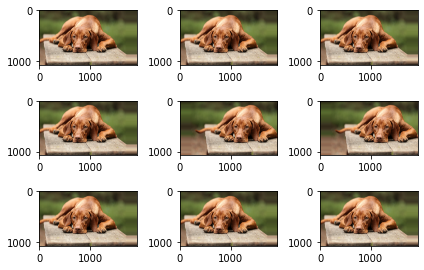

In [ ]:
# Convertimos la imagen a un arreglo
data = img_to_array(img)
# realizamos una expansion a una muestra 
samples = expand_dims(data, 0)
# Creamos el aumentador de datos utilizando solo cambio de imgen 
datagen = ImageDataGenerator(width_shift_range=[-200,200])
# preparamos el iterator
it = datagen.flow(samples, batch_size=1)
# generamos muestras y mostramos los resultados
for i in range(9):
	plt.subplot(330 + 1 + i)
	# se generan lotes de imagenes
	batch = it.next()
	image = batch[0].astype('uint8') #se convierte a un valor valido para poder mostrarlo como imagen 
	plt.imshow(image)
	plt.tight_layout()
plt.show()

Un giro de imagen significa invertir las filas o columnas de píxeles en el caso de un giro vertical u horizontal, respectivamente.
El aumento se especifica mediante un argumento booleano **horizontal_flip** o **vertical_flip** para la clase **ImageDataGenerator**.

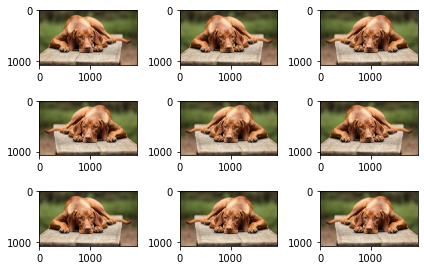

In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

La cantidad de zoom se muestrea uniformemente al azar de la región de zoom para cada dimensión (ancho, alto) por separado.

Flotante o [limite inferior, limite superior]. Rango para zoom aleatorio. Si es un flotante, [limite inferior, limite superior] = [1-zoom_range, 1 + zoom_range]

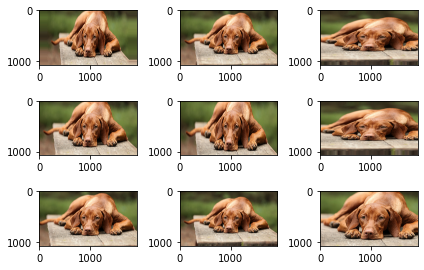

In [ ]:
datagen = ImageDataGenerator(zoom_range=.5) #float o Rango [lower,upper]
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
 
plt.show()

Se gira aleatoriamente la imagen en el sentido de las agujas del reloj un número determinado de grados de 0 a 360. Es probable que gire los píxeles fuera del marco de la imagen y deje áreas del marco sin datos de píxeles, que deban completarse.

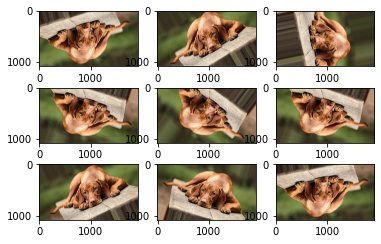

In [ ]:
datagen = ImageDataGenerator(rotation_range=220)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

La combinacion de estas tecnicas nos permite aumentar la cantidad de datos del dataset a utilizar, en muchos trabajos se utiliza una aumentacion de datos para aumentar la cantidad de imagenes de entrenamiento y mejorar la precision del trabajo.


              featurewise_center: Boleano, poner la media de cada elemento en cero de todos los datos.
              samplewise_center**: Boleano, poener la media del cada muestra a cero
              featurewise_std_normalization: Boleano, Divida las entradas por la desviación estándar (std.) del conjunto de datos, según las características.
              samplewise_std_normalization: Boleano, divide cada dato por su std.
              zca_epsilon: El valor predeterminado es 1e-6.
              zca_whitening: Boleano, indica si se aplica el blanqueo ZCA.      

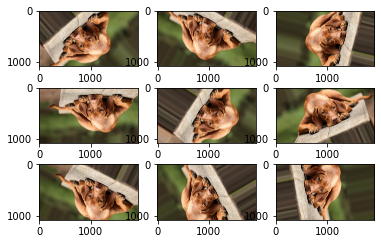

In [ ]:
datagen = ImageDataGenerator(
            rotation_range               = 90,      
            width_shift_range            = [100,100],   
            height_shift_range           = [100,100],   
            horizontal_flip              = True,   
            vertical_flip                = True)  
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

Ahora consideramos palabras, el trabajo necesario no es tan sencillo dado la complejidad inherente del lenguaje (no podemos reemplazar cada palabra por su sinónimo e incluso si lo hacemos, corremos el riesgo de que el significado de la oración cambie completamente.
Existen algunas librerias que nos pueden ayudar a realizar esta tarea, iniciaremos analizando las siguientes:


1.   Text Attack
2.   Google Trans

# TextAttack
Es un framework de Python para ataques de adversario, entrenamiento de adversarios y aumento de datos en NLP. Nos centraremos solo en el aumento de datos.

In [ ]:
!pip install textattack

     |████████████████████████████████| 327kB 5.4MB/s 
     |████████████████████████████████| 1.7MB 22.7MB/s 
     |████████████████████████████████| 245kB 46.0MB/s 
     |████████████████████████████████| 61kB 10.7MB/s 
     |████████████████████████████████| 686kB 52.9MB/s 
     |████████████████████████████████| 778kB 49.2MB/s 
     |████████████████████████████████| 317kB 48.3MB/s 
     |████████████████████████████████| 1.1MB 58.5MB/s 
     |████████████████████████████████| 153kB 48.1MB/s 
     |████████████████████████████████| 61kB 10.1MB/s 
     |████████████████████████████████| 3.0MB 37.6MB/s 
     |████████████████████████████████| 102kB 15.3MB/s 
     |████████████████████████████████| 235kB 59.8MB/s 
     |████████████████████████████████| 122kB 59.8MB/s 
     |████████████████████████████████| 102kB 14.6MB/s 
     |████████████████████████████████| 163kB 54.9MB/s 
     |████████████████████████████████| 102kB 15.9MB/s 
     |████████████████████████████████| 19.7MB 161k

In [ ]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


2020-10-09 21:37:47 INFO: Downloading default packages for language: en (English)...
2020-10-09 21:39:27 INFO: Finished downloading models and saved to /root/stanza_resources.
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [ ]:
text = "Will you look back on life and say, I wish I had, or I’m glad I did?"

TextAttack nos proporciona cuatro métodos para el aumento de datos.


## WordNetAugmenter
Aumenta el texto reemplazándolo con sinónimos del tesauro (diccionario de sinónimos) de WordNet.

WordNet es una base de datos léxica del inglés. Los sustantivos, verbos, adjetivos y adverbios se agrupan en conjuntos de sinónimos cognitivos (synsets), cada uno de los cuales expresa un concepto distinto.
WordNet se parece superficialmente a un tesauro, ya que agrupa las palabras en función de su significado.



In [ ]:
aug = WordNetAugmenter();
aug.augment(text)

['Will you look back on life and enounce, I wish I had, or I’m glad I did?']


## EmbeddingAugmenter
 Aumenta el texto transformando palabras con sus incrustaciones, con una restricción para garantizar que su similitud de coseno sea de al menos 0,8.


In [ ]:
aug = EmbeddingAugmenter();
aug.augment(text)

textattack: Downloading https://textattack.s3.amazonaws.com/word_embeddings/paragramcf.
100%|██████████| 481M/481M [00:13<00:00, 35.0MB/s]
textattack: Unzipping file /root/.cache/textattack/tmp5nhskcvl.zip to /root/.cache/textattack/word_embeddings/paragramcf.
textattack: Successfully saved word_embeddings/paragramcf to cache.


['Will you look back on life and say, I wish I had, or I’m delighted I did?']

## CharSwapAugmenter
Aumenta el texto sustituyendo, eliminando, insertando e intercambiando caracteres adyacentes.

In [ ]:
aug = CharSwapAugmenter()
aug.augment(text)

['Will you jlook back on life and say, I wish I had, or I’m glad I did?']


## EasyDataAugmenter
Esto aumenta el texto con una combinación de reemplazo de sinónimos de Wordnet, eliminación de palabras, cambios de orden de palabras e inserciones de sinónimos. Todas estas 4 funcionalidades ocurren de forma aleatoria. Entonces obtendremos resultados diferentes cada vez que ejecutemos el código. Esto devuelve 4 resultados aumentados, a diferencia de los otros métodos.


In [ ]:
aug = EasyDataAugmenter()
aug.augment(text)

['Will you look back front on life and say, I wish I had, or I’m glad I did?',
 'Will you look gage on life and say, I wish I had, or I’m glad I did?',
 'wish you look back on life and say, I Will I had, or I’m glad I did?',
 'Will you look back life and say, I wish I had, or I’m glad I did?']

Googletrans  utiliza la API Ajax de Google Translate para la detección y traducción de idiomas.

Los parámetros clave para el método **translate ()** son:



1.   **src**: idioma de origen. este parámetro es opcional ya que **googletrans** lo detectará.
2.   **dest**: idioma de destino. Parámetro obligatorio.

1.   **text**: el texto que se va a traducir del idioma de origen al idioma de destino. Parámetro obligatorio.





 



Al utilizar este metodo lo que ocurre es una retraduccion, pasamos del idioma original a un idioma destino y luego regresamos al original, durante esta retrotraducción, hay un ligero cambio en la oración entre el texto original y el texto retrotraducido, pero el significado general de la oración aún se conserva.

Los idiomas soportados se pueden consultar en https://cloud.google.com/translate/docs/languages?hl=es

Para obtener los mejores resultados se recomienda hacer algunas pruebas con los idiomas, si el lenguaje destino es muy similar la traduccion no pierde informacion, sin embargo se puede tener el problema de que la traduccion sea demasiado literal, esto se vuelve un poco un problema de prueba y error.


Algunos ejemplos de idiomas:


*   Afrikáans	'af'

*   Chino (simplificado) 	'zh-CN o zh'

*   Esperanto	'eo'

*   Japonés	'ja'
*   Latín	'la'


*   Español	'es'


*   Turcomano	'tk'


*   Yiddish	'yi'

*   Zulú	'zu'



In [ ]:
!pip install googletrans

     |████████████████████████████████| 61kB 4.3MB/s 
     |████████████████████████████████| 51kB 7.6MB/s 
     |████████████████████████████████| 972kB 13.5MB/s 
     |████████████████████████████████| 71kB 10.8MB/s 
     |████████████████████████████████| 61kB 9.7MB/s 
     |████████████████████████████████| 102kB 12.6MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=9ec598d60050848178252b4865cf48c183ecd0e20fe43477001f02cc009d24ef
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=4a5e5eab9a5f1aed0dda9b8a3f0e66dedca848a10bb6448495fbda5dfbdc70cf
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [ ]:
from googletrans import Translator
translator = Translator()

In [ ]:
origin_text = "If at first you don’t succeed, try, try again."
text_trans = translator.translate(text=origin_text, dest='zu').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

If at first you don’t succeed, try, try again.
Uma ekuqaleni ungaphumeleli, zama, uzame futhi.
If at first you fail, try again.
